In [1]:
import torch
from transformers import AutoProcessor, Blip2ForConditionalGeneration
from PIL import Image
import time
import glob

C:\Users\msubr\Anaconda3\envs\bert\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
frames = glob.glob("d:/data/UCF-crime/Anomaly-videos-part-1/Assault_frames/Assault031*.jpg")
len(frames)

756

In [3]:
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
# by default `from_pretrained` loads the weights in float32
# we load in float16 instead to save memory
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16) 

Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [00:38<00:00, 19.39s/it]


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print(device)

cuda


In [5]:
images = []
for idx in range(0, len(frames), 10):
    images.append(Image.open(frames[idx]))

In [20]:
inputs = processor(images, return_tensors="pt").to(device, torch.float16)

st = time.time()
generated_ids = model.generate(**inputs, max_new_tokens=20)
end = time.time()
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print("Time:", end - st)

Time: 9.080848217010498


In [23]:
for i, t in enumerate(generated_text):
    print(i, t)

0 a black background with a white clock on it

1 a black background with a white clock on it

2 greater manchester police logo

3 greater manchester police logo

4 greater manchester police logo

5 greater manchester police logo

6 greater manchester police logo

7 deangate assault 28 11 11

8 deangate assault 28 11 11

9 deangate assault 28 11 11

10 deangate assault 28 11 11

11 deangate assault 28 11 11

12 deangate assault 28 11 11

13 a group of men standing around in a courtyard

14 a group of people standing around a man in blue

15 a group of men are standing around in a courtyard

16 a group of men in blue shirts are standing around

17 a group of men in blue shirts are standing around

18 a man is being held by two men in blue shirts

19 a man is being held by two men in blue shirts

20 a man is being held by several people in a video

21 a group of people are standing around a man

22 a group of people are standing around a man

23 a group of men are seen in a video

24 a gr

a group of men are fighting in the street



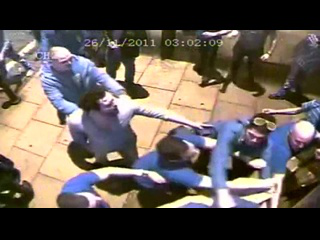

In [34]:
print(generated_text[27])
images[27]

In [16]:
prompt = "Question: what is happening in this picture? Answer:"
inputs = processor(images[27], text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
gen_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(gen_text)

[' a bunch of people fighting\n']


In [18]:
prompt = "Question: is some one at danger? Answer:"
inputs = processor(images[27], text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
gen_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(gen_text)

[' yes\n']


In [19]:
prompt = "Question: why? Answer:"
inputs = processor(images[27], text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
gen_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(gen_text)

[" because they're fucking idiots\n"]


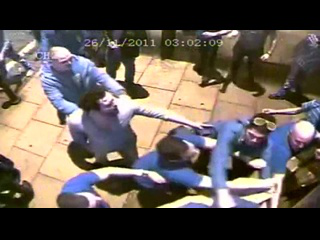

In [40]:
images[27]

In [41]:
prompt = ["Question: what is happening in this picture? Answer:",
          "Question: how many people are there? Answer:",
          "Question: why is this happening? Answer:",
          "Question: what is going to happend next? Answer:"]
inputs = processor([images[30]]*4, text=prompt, padding=True, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
gen_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(gen_text)

['\n', '\n', '\n', ' nothing\n']
